In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import calendar

In [6]:
data = pd.read_csv('bollywood.csv')
data.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736


#### 1. How many records are present in the dataset? Print the metadata information of the dataset.

In [8]:
data.shape

(51, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   51 non-null     int64  
 1   RelDate              51 non-null     object 
 2   MovieName            51 non-null     object 
 3   ReleaseTime          51 non-null     int64  
 4   Genre                51 non-null     object 
 5   Budget               51 non-null     object 
 6   BoxOfficeCollection  51 non-null     object 
 7   YoutubeViews         51 non-null     int64  
 8   YoutubeLikes         50 non-null     float64
 9   YoutubeDislikes      48 non-null     float64
 10  YoutubeLikeDislikes  51 non-null     int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.5+ KB


#### 2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [10]:
data['Genre'].value_counts()

ComedyGenre     12
 DramaGenre     11
RomanceGenre     9
ActionGenre      9
Thriller         5
Thriller         3
Action           1
 Drama           1
Name: Genre, dtype: int64

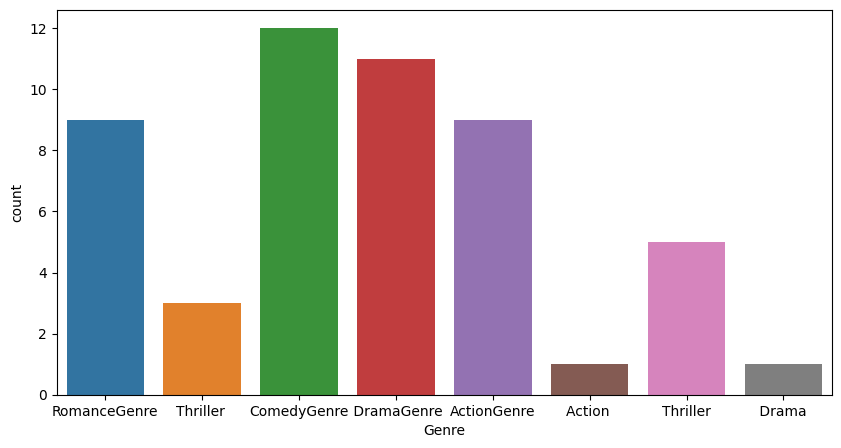

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(x ='Genre', data = data)
plt.show()

#### 3. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

##### RELEASE DATE

In [27]:
# data['new_Rel_Date'] = pd.to_datetime(data['RelDate'])
# data.head()

In [14]:
data['MonthOfRel'] = data['RelDate'].str[:3]
data['DateOfRel'] = data['RelDate'].str[4:6]
data['YearOfRel'] = data['RelDate'].str[-4:]

In [16]:
data.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,MonthOfRel,DateOfRel,YearOfRel
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149,Apr,18,2014
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266,Jan,4-,2013
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640,Jul,18,2014
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105,Jan,4-,2013
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736,Jul,4-,2014


In [15]:
data.groupby(['DateOfRel'])['No'].count()

DateOfRel
09    1
1-    2
10    1
11    3
12    1
13    1
14    2
15    4
18    6
19    2
2-    2
20    1
21    2
22    2
23    1
24    2
25    2
27    1
28    1
30    1
4-    3
6-    2
7-    3
8-    4
9-    1
Name: No, dtype: int64

In [18]:
data.groupby(['YearOfRel'])['No'].count()

YearOfRel
-204     1
2013    19
2014    31
Name: No, dtype: int64

Instead of -204, it should have been 2014

In [21]:
data.RelDate = data.RelDate.replace(to_replace=r'204', value='2014', regex=True)


In [23]:
data.groupby(['MonthOfRel'])['No'].count()

MonthOfRel
Apr     1
Aug     1
Feb     9
Jan    10
Jul     6
Jum     1
Jun     3
Mar     7
May     5
Nov     2
Oct     2
Sep     2
Sqp     1
juu     1
Name: No, dtype: int64

In [25]:
data['MonthOfRel'].value_counts()

Jan    10
Feb     9
Mar     7
Jul     6
May     5
Jun     3
Sep     2
Oct     2
Nov     2
Apr     1
Sqp     1
Jum     1
Aug     1
juu     1
Name: MonthOfRel, dtype: int64

Incorrect months

In [26]:
data.RelDate = data.RelDate.replace(to_replace=r'juu', value='Jun', regex=True)
data.RelDate = data.RelDate.replace(to_replace=r'Jum', value='Jun', regex=True)
data.RelDate = data.RelDate.replace(to_replace=r'Sqp', value='Sep', regex=True)

#bollywood.RelDate = bollywood.RelDate.replace("Sqp-19-2014", "Sep-19-2014")
#bollywood.head()

In [28]:
data['FormattedRelDate'] = pd.to_datetime(data['RelDate'])
data.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,MonthOfRel,DateOfRel,YearOfRel,FormattedRelDate
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149,Apr,18,2014,2014-04-18
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266,Jan,4-,2013,2013-01-04
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640,Jul,18,2014,2014-07-18
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105,Jan,4-,2013,2013-01-04
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736,Jul,4-,2014,2014-07-04


In [30]:
### Dropping Columns created for validations
data = data.drop(['MonthOfRel', 'DateOfRel', 'YearOfRel'], axis = 1)
data.head(4)

KeyError: "['MonthOfRel', 'DateOfRel', 'YearOfRel'] not found in axis"

In [31]:
data.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149,2014-04-18
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266,2013-01-04
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640,2014-07-18
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105,2013-01-04
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736,2014-07-04


In [33]:
data['MonthOfRel'] = data['FormattedRelDate'].dt.month
data['DateOfRel'] = data['FormattedRelDate'].dt.day
data['YearOfRel'] = data['FormattedRelDate'].dt.year

In [34]:
data.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate,MonthOfRel,DateOfRel,YearOfRel
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149,2014-04-18,4,18,2014
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266,2013-01-04,1,4,2013
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640,2014-07-18,7,18,2014
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105,2013-01-04,1,4,2013
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736,2014-07-04,7,4,2014


In [37]:
data['MonthName'] = data['MonthOfRel'].apply(lambda x: calendar.month_name[x])

In [38]:
data.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate,MonthOfRel,DateOfRel,YearOfRel,MonthName
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149,2014-04-18,4,18,2014,April
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266,2013-01-04,1,4,2013,January
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640,2014-07-18,7,18,2014,July
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105,2013-01-04,1,4,2013,January
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736,2014-07-04,7,4,2014,July


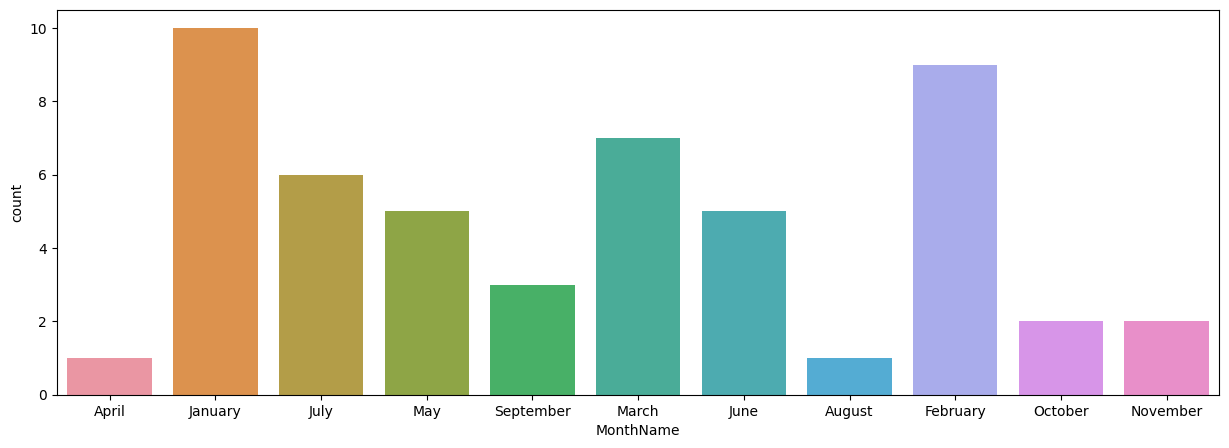

In [41]:
plt.figure(figsize=(15, 5))
sns.countplot(x ='MonthName', data = data)
plt.show()

##### GENRE

In [48]:
data['Genre'].value_counts()

ComedyGenre     12
 DramaGenre     11
RomanceGenre     9
ActionGenre      9
Thriller         5
Thriller         3
Action           1
 Drama           1
Name: Genre, dtype: int64

In [59]:
data['Genre'].replace({
    "ActionGenre": "Action",
    " DramaGenre":"Drama",
    "Thriller ":"Thriller",
    "ComedyGenre":"Comedy",
    "RomanceGenre":"Romance",
    "Action ":"Action",
    " Drama ":"Drama"
    }, inplace=True)

In [60]:
data['Genre'].value_counts()

Comedy      12
Drama       12
Action      10
Romance      9
Thriller     8
Name: Genre, dtype: int64

In [58]:
data['Genre'].unique()

array(['Romance', 'Thriller', 'Comedy', 'Drama', 'Action', 'Action ',
       ' Drama '], dtype=object)

In [61]:
data.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'YoutubeLikeDislikes', 'FormattedRelDate',
       'MonthOfRel', 'DateOfRel', 'YearOfRel', 'MonthName'],
      dtype='object')

<Axes: xlabel='Genre', ylabel='count'>

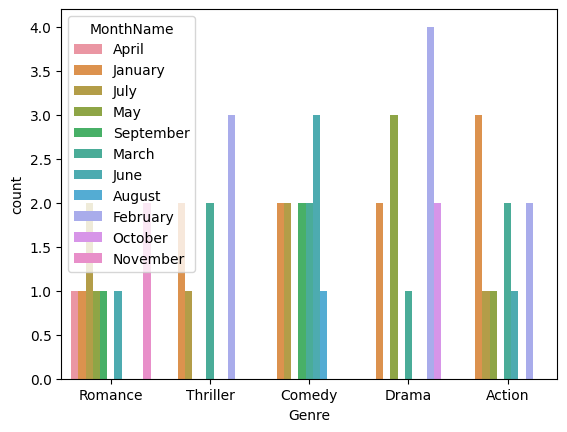

In [63]:
sns.countplot(x ='Genre', hue = "MonthName", data = data)

<Axes: xlabel='count', ylabel='Genre'>

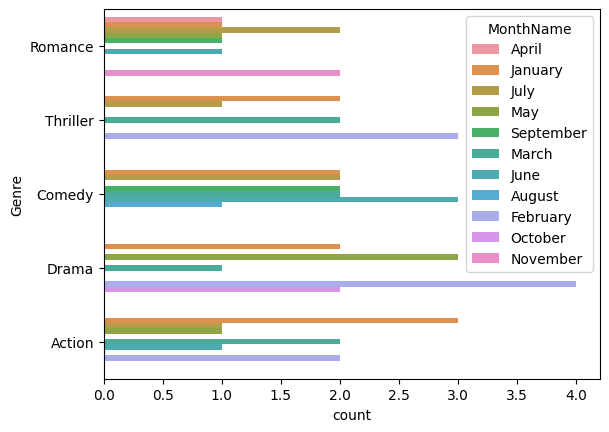

In [65]:
# count plot along y axis
sns.countplot(y ='Genre', hue = "MonthName", data = data)


In [74]:
data.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'YoutubeLikeDislikes', 'FormattedRelDate',
       'MonthOfRel', 'DateOfRel', 'YearOfRel', 'MonthName'],
      dtype='object')

In [76]:
Cross_tab = pd.crosstab( data['Genre'], data['ReleaseTime'])
Cross_tab

ReleaseTime,1,2,3,4,44
Genre,,,,,
Action,0,2,0,8,0
Comedy,0,3,1,7,1
Drama,2,3,1,6,0
Romance,0,2,1,6,0
Thriller,1,0,1,6,0


#### 4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

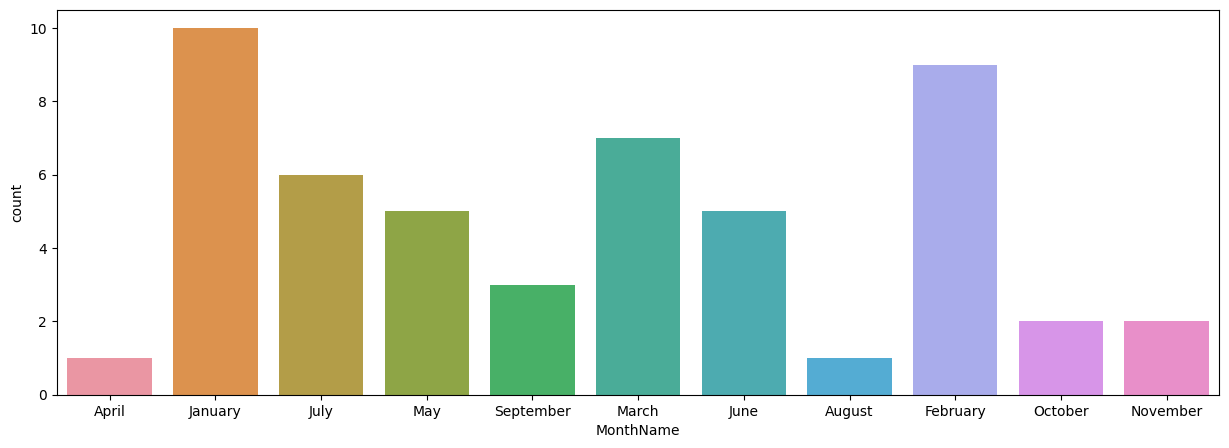

In [46]:
plt.figure(figsize=(15, 5))
sns.countplot(x ='MonthName', data = data)
plt.show()

#### 5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [47]:
data.head(5)

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate,MonthOfRel,DateOfRel,YearOfRel,MonthName
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149,2014-04-18,4,18,2014,April
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266,2013-01-04,1,4,2013,January
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640,2014-07-18,7,18,2014,July
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105,2013-01-04,1,4,2013,January
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736,2014-07-04,7,4,2014,July


In [67]:
data.groupby(['Budget'])['No'].count()

Budget
100Cr    1
10Cr     4
11Cr     1
120Cr    1
125Cr    1
12Cr     5
15Cr     2
16Cr     1
18Cr     1
20Cr     1
21Cr     1
24Cr     1
27Cr     1
28Cr     1
2Cr      1
30Cr     3
31Cr     1
33Cr     1
35Cr     2
36Cr     2
42Cr     1
48Cr     1
4Cr      2
50Cr     2
5Cr      2
60Cr     1
75Cr     1
7Cr      3
8Cr      1
Cr10     2
Cr30     1
Cr5      1
Cr60     1
Name: No, dtype: int64

In [66]:
data['Budget'].value_counts()

12Cr     5
10Cr     4
7Cr      3
30Cr     3
35Cr     2
50Cr     2
Cr10     2
15Cr     2
4Cr      2
36Cr     2
5Cr      2
125Cr    1
75Cr     1
120Cr    1
Cr30     1
20Cr     1
100Cr    1
Cr5      1
8Cr      1
21Cr     1
11Cr     1
27Cr     1
42Cr     1
48Cr     1
24Cr     1
Cr60     1
60Cr     1
28Cr     1
2Cr      1
31Cr     1
33Cr     1
18Cr     1
16Cr     1
Name: Budget, dtype: int64

In [68]:
data['Budget'] = pd.to_numeric(data['Budget'],downcast='float')

ValueError: Unable to parse string "36Cr" at position 0

In [69]:
data['Budget'] = data['Budget'].replace(to_replace=r'Cr', value='', regex=True)

In [70]:
data['Budget'] = pd.to_numeric(data['Budget'], downcast='float')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   51 non-null     int64         
 1   RelDate              51 non-null     object        
 2   MovieName            51 non-null     object        
 3   ReleaseTime          51 non-null     int64         
 4   Genre                51 non-null     object        
 5   Budget               51 non-null     float32       
 6   BoxOfficeCollection  51 non-null     object        
 7   YoutubeViews         51 non-null     int64         
 8   YoutubeLikes         50 non-null     float64       
 9   YoutubeDislikes      48 non-null     float64       
 10  YoutubeLikeDislikes  51 non-null     int64         
 11  FormattedRelDate     51 non-null     datetime64[ns]
 12  MonthOfRel           51 non-null     int64         
 13  DateOfRel            51 non-null     

In [77]:
data.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate,MonthOfRel,DateOfRel,YearOfRel,MonthName
0,1,Apr-18-2014,2 States,3,Romance,36.0,104,8576361,26622.0,2527.0,29149,2014-04-18,4,18,2014,April
1,2,Jan-4-2013,Table No. 21,4,Thriller,10.0,12,1087320,1129.0,137.0,1266,2013-01-04,1,4,2013,January
2,3,Jul-18-2014,Amit Sahni Ki List,4,Comedy,10.0,4,572336,586.0,54.0,640,2014-07-18,7,18,2014,July
3,4,Jan-4-2013,Rajdhani Express,4,Drama,7.0,383,42626,86.0,19.0,105,2013-01-04,1,4,2013,January
4,5,Jul-4-2014,Bobby Jasoos,44,Comedy,18.0,10.8,3113427,4512.0,1224.0,5736,2014-07-04,7,4,2014,July


In [87]:
x = data[data['Budget'] > 25][['MonthName','Budget']]
x

,MonthName,Budget
21,March,27.0
10,March,28.0
33,February,30.0
34,February,30.0
6,September,30.0
38,March,30.0
8,January,31.0
7,January,33.0
45,November,35.0
12,June,35.0


In [88]:
type(x)

pandas.core.frame.DataFrame

In [89]:
x.head()

,MonthName,Budget
21,March,27.0
10,March,28.0
33,February,30.0
34,February,30.0
6,September,30.0


In [90]:
x.head()

,MonthName,Budget
21,March,27.0
10,March,28.0
33,February,30.0
34,February,30.0
6,September,30.0


In [92]:
x.sort_values(by=['Budget'], ascending=False)

,MonthName,Budget
26,October,125.0
41,January,120.0
43,July,100.0
39,June,75.0
14,August,60.0
16,January,60.0
22,February,50.0
36,June,50.0
24,November,48.0
25,February,42.0


#### 6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [96]:
data['BoxOfficeCollection'] = data['BoxOfficeCollection'].replace(to_replace=r'Cr', value='', regex=True)
data['BoxOfficeCollection'] = pd.to_numeric(data['BoxOfficeCollection'], downcast='float')

In [113]:
data['ROI'] = data.apply(lambda rec: 
(rec.BoxOfficeCollection - rec.Budget) / rec.Budget, axis=1)

In [138]:
data['ROI_%_1'] = pd.Series(["{0:.0f}%".format(val * 100) for val in data['ROI']], index = data.index)
data.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate,MonthOfRel,DateOfRel,YearOfRel,MonthName,ROI,ROI_%,ROI_%_1
9,10,Jan-11-2013,Gangoobai,4,Drama,2.0,0.01,4354,1.0,NaN,2,2013-01-11,1,11,2013,January,-0.9950,-99.50%,-100%
15,16,Jan-18-2013,Bandook,4,Action,4.0,0.09,28391,8.0,14.0,22,2013-01-18,1,18,2013,January,-0.9775,-97.75%,-98%
13,14,Jan-18-2013,Mumbai Mirror,4,Action,4.0,1.80,235767,192.0,164.0,356,2013-01-18,1,18,2013,January,-0.5500,-55.00%,-55%
11,12,Jan-18-2013,Inkaar,4,Romance,5.0,10.25,1077723,897.0,114.0,1011,2013-01-18,1,18,2013,January,1.0500,105.00%,105%
44,45,Mar-15-2013,3G,4,Thriller,5.0,5.82,1200152,1385.0,345.0,1730,2013-03-15,3,15,2013,March,0.1640,16.40%,16%


In [114]:

data['ROI_%'] = pd.Series(["{0:.2f}%".format(val * 100) for val in data['ROI']], index = data.index)
data.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,...,FormattedRelDate,MonthOfRel,DateOfRel,YearOfRel,MonthName,change,change2,change3,ROI,ROI_%
9,10,Jan-11-2013,Gangoobai,4,Drama,2.0,0.01,4354,1.0,NaN,...,2013-01-11,1,11,2013,January,-0.9950,-1.00,-99.50%,-0.9950,-99.50%
15,16,Jan-18-2013,Bandook,4,Action,4.0,0.09,28391,8.0,14.0,...,2013-01-18,1,18,2013,January,-0.9775,-0.98,-97.75%,-0.9775,-97.75%
13,14,Jan-18-2013,Mumbai Mirror,4,Action,4.0,1.80,235767,192.0,164.0,...,2013-01-18,1,18,2013,January,-0.5500,-0.55,-55.00%,-0.5500,-55.00%
11,12,Jan-18-2013,Inkaar,4,Romance,5.0,10.25,1077723,897.0,114.0,...,2013-01-18,1,18,2013,January,1.0500,1.05,105.00%,1.0500,105.00%
44,45,Mar-15-2013,3G,4,Thriller,5.0,5.82,1200152,1385.0,345.0,...,2013-03-15,3,15,2013,March,0.1640,0.16,16.40%,0.1640,16.40%


In [119]:
data = data.drop(['change', 'change2','change3'], axis=1)

In [115]:
data[['MovieName','ROI_%']].sort_values('ROI_%',ascending = False)[0:10]

,MovieName,ROI_%
38,The Attacks of 26/11,6.67%
37,Humpty Sharma Ki Dulhania,550.00%
3,Rajdhani Express,5371.43%
22,Gunday,53.40%
40,"Saheb, Biwi Aur Gangster Returns",46.67%
5,Citylights,400.00%
18,Finding Fanny,292.67%
43,Kick,277.00%
27,ABCD _ Any Body Can Dance,266.67%
19,Fugly,26.00%


#### 8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

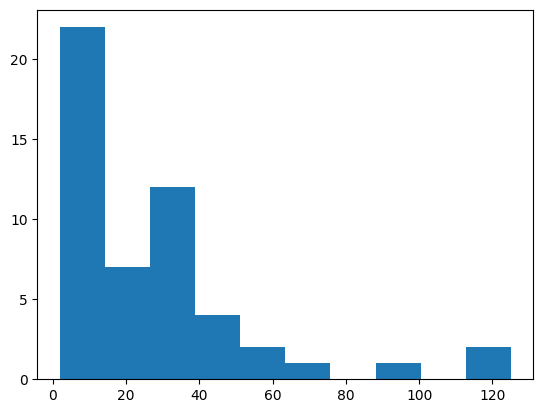

In [108]:
plt.hist(data['Budget']);

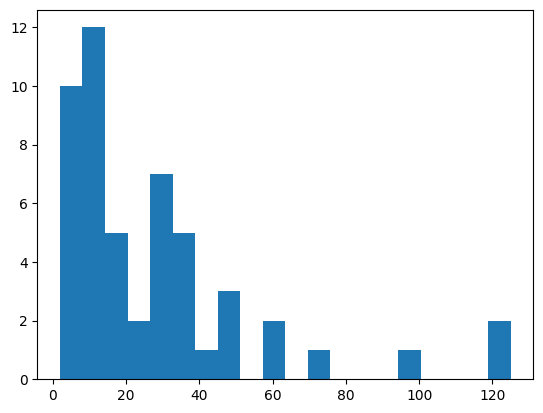

In [109]:
plt.hist(data['Budget'], bins=20);

/var/folders/xc/16dj9yzx3116nf3_z4ntqmnh0000gn/T/ipykernel_11067/1029982757.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Budget']);


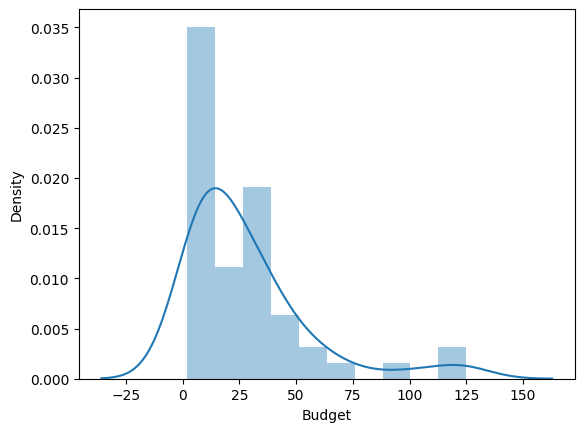

In [110]:
sns.distplot(data['Budget']);

#### 9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

In [139]:
data.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate,MonthOfRel,DateOfRel,YearOfRel,MonthName,ROI,ROI_%,ROI_%_1
9,10,Jan-11-2013,Gangoobai,4,Drama,2.0,0.01,4354,1.0,NaN,2,2013-01-11,1,11,2013,January,-0.9950,-99.50%,-100%
15,16,Jan-18-2013,Bandook,4,Action,4.0,0.09,28391,8.0,14.0,22,2013-01-18,1,18,2013,January,-0.9775,-97.75%,-98%
13,14,Jan-18-2013,Mumbai Mirror,4,Action,4.0,1.80,235767,192.0,164.0,356,2013-01-18,1,18,2013,January,-0.5500,-55.00%,-55%
11,12,Jan-18-2013,Inkaar,4,Romance,5.0,10.25,1077723,897.0,114.0,1011,2013-01-18,1,18,2013,January,1.0500,105.00%,105%
44,45,Mar-15-2013,3G,4,Thriller,5.0,5.82,1200152,1385.0,345.0,1730,2013-03-15,3,15,2013,March,0.1640,16.40%,16%


In [140]:
data['ROI%'] = data['ROI_%_1'].str.replace('[%]', '')
data.head()

/var/folders/xc/16dj9yzx3116nf3_z4ntqmnh0000gn/T/ipykernel_11067/3551276647.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['ROI%'] = data['ROI_%_1'].str.replace('[%]', '')


,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,FormattedRelDate,MonthOfRel,DateOfRel,YearOfRel,MonthName,ROI,ROI_%,ROI_%_1,ROI%
9,10,Jan-11-2013,Gangoobai,4,Drama,2.0,0.01,4354,1.0,NaN,2,2013-01-11,1,11,2013,January,-0.9950,-99.50%,-100%,-100
15,16,Jan-18-2013,Bandook,4,Action,4.0,0.09,28391,8.0,14.0,22,2013-01-18,1,18,2013,January,-0.9775,-97.75%,-98%,-98
13,14,Jan-18-2013,Mumbai Mirror,4,Action,4.0,1.80,235767,192.0,164.0,356,2013-01-18,1,18,2013,January,-0.5500,-55.00%,-55%,-55
11,12,Jan-18-2013,Inkaar,4,Romance,5.0,10.25,1077723,897.0,114.0,1011,2013-01-18,1,18,2013,January,1.0500,105.00%,105%,105
44,45,Mar-15-2013,3G,4,Thriller,5.0,5.82,1200152,1385.0,345.0,1730,2013-03-15,3,15,2013,March,0.1640,16.40%,16%,16


In [145]:
data["ROI%"] = pd.to_numeric(data['ROI%'], errors='coerce')

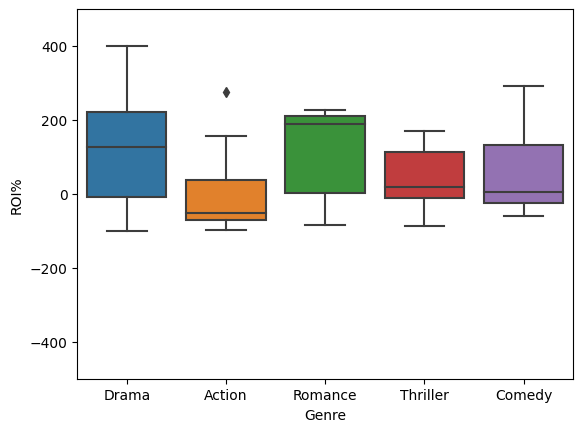

In [151]:
sns.boxplot( x = 'Genre', y = 'ROI%', data = data);
plt.ylim(-500, 500)
plt.show()

#### 10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [152]:
data.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'YoutubeLikeDislikes', 'FormattedRelDate',
       'MonthOfRel', 'DateOfRel', 'YearOfRel', 'MonthName', 'ROI', 'ROI_%',
       'ROI_%_1', 'ROI%'],
      dtype='object')

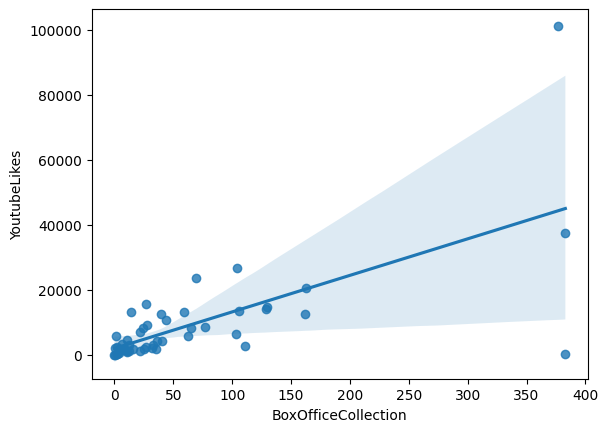

In [155]:
sns.regplot(x = data['BoxOfficeCollection'],
y = data['YoutubeLikes']);

In [153]:
influential_features = ['BoxOfficeCollection','YoutubeLikes']
data[influential_features].corr()

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.673429
YoutubeLikes,0.673429,1.000000


#### 11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

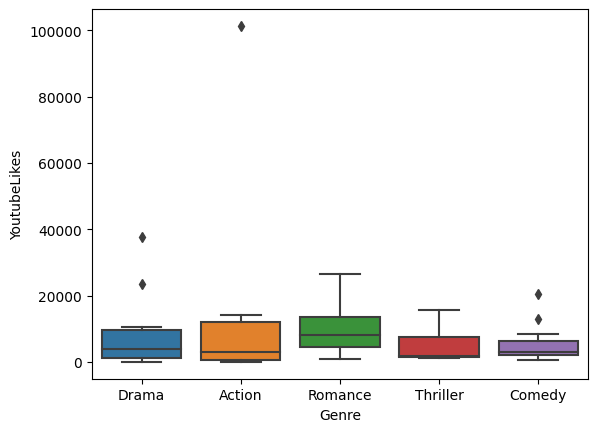

In [156]:
sns.boxplot( x = 'Genre', y = 'YoutubeLikes', data = data);

#### 12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes,YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

In [158]:
data.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'YoutubeLikeDislikes', 'FormattedRelDate',
       'MonthOfRel', 'DateOfRel', 'YearOfRel', 'MonthName', 'ROI', 'ROI_%',
       'ROI_%_1', 'ROI%'],
      dtype='object')

/Users/tulsipatro/Dev/Basics/pythonenv/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


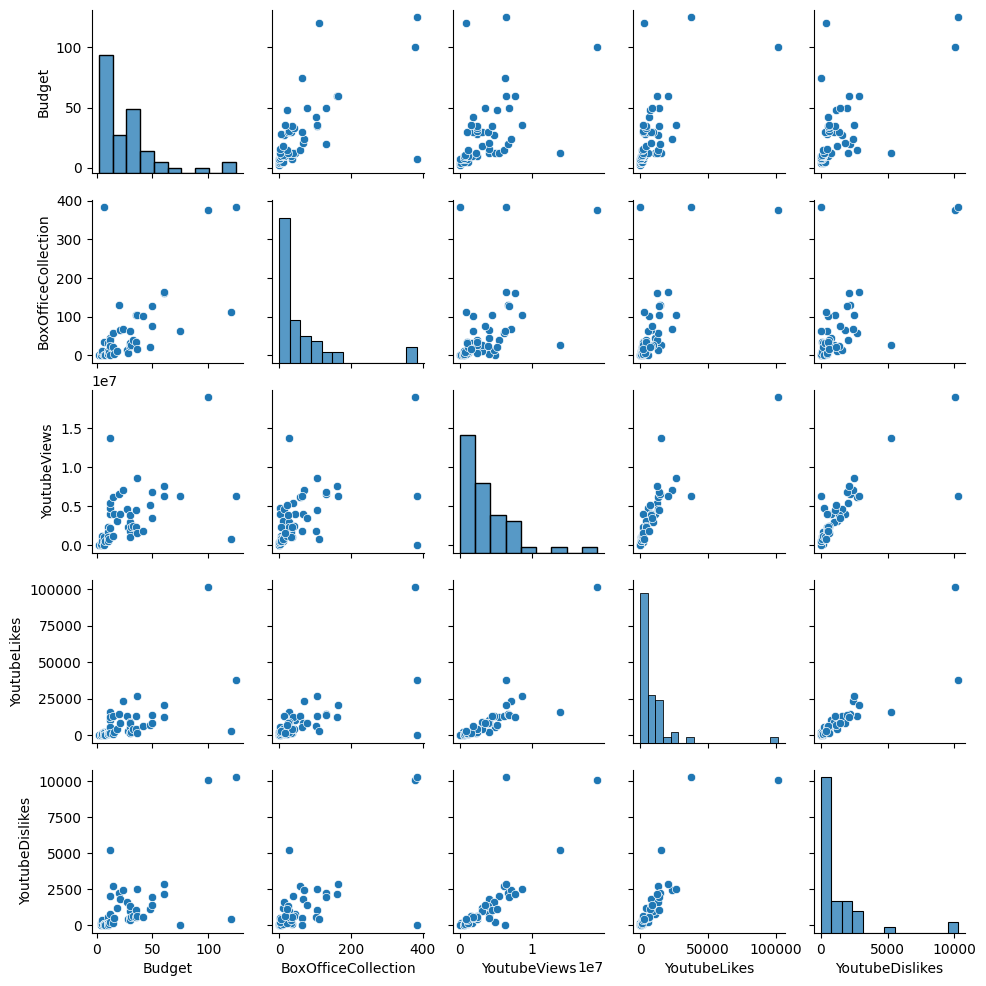

In [159]:
influential_features = ['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']
sns.pairplot(data[influential_features],size=2)

https://anandsarank.medium.com/feature-engineering-bollywood-movies-f55edea7b410